# Notebook 5: Results Visualization & Export

This notebook exports all visualizations and tables for the final report.

## Steps:
1. Load all results
2. Create summary dashboard
3. Export high-resolution visualizations
4. Generate summary tables
5. Prepare data for report

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add project root to Python path for proper module imports
project_root = os.path.dirname(os.getcwd())  # Go up one level from notebooks/
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import custom modules
from src import utils, preprocessing, feature_engineering, models

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load All Data and Results

In [2]:
# Load labeled dataset
df = pd.read_csv(utils.get_processed_data_path('tweets_labeled.csv'))

# Load model comparison
model_comparison = pd.read_csv(utils.get_outputs_path('tables/model_comparison.csv'))

# Load EDA summary
eda_summary = pd.read_csv(utils.get_outputs_path('tables/eda_summary.csv'))

print("All data loaded successfully")
print(f"Labeled tweets: {len(df)}")
print(f"Model comparison: {len(model_comparison)} models")

All data loaded successfully
Labeled tweets: 330
Model comparison: 2 models


## 2. Create Executive Summary Dashboard

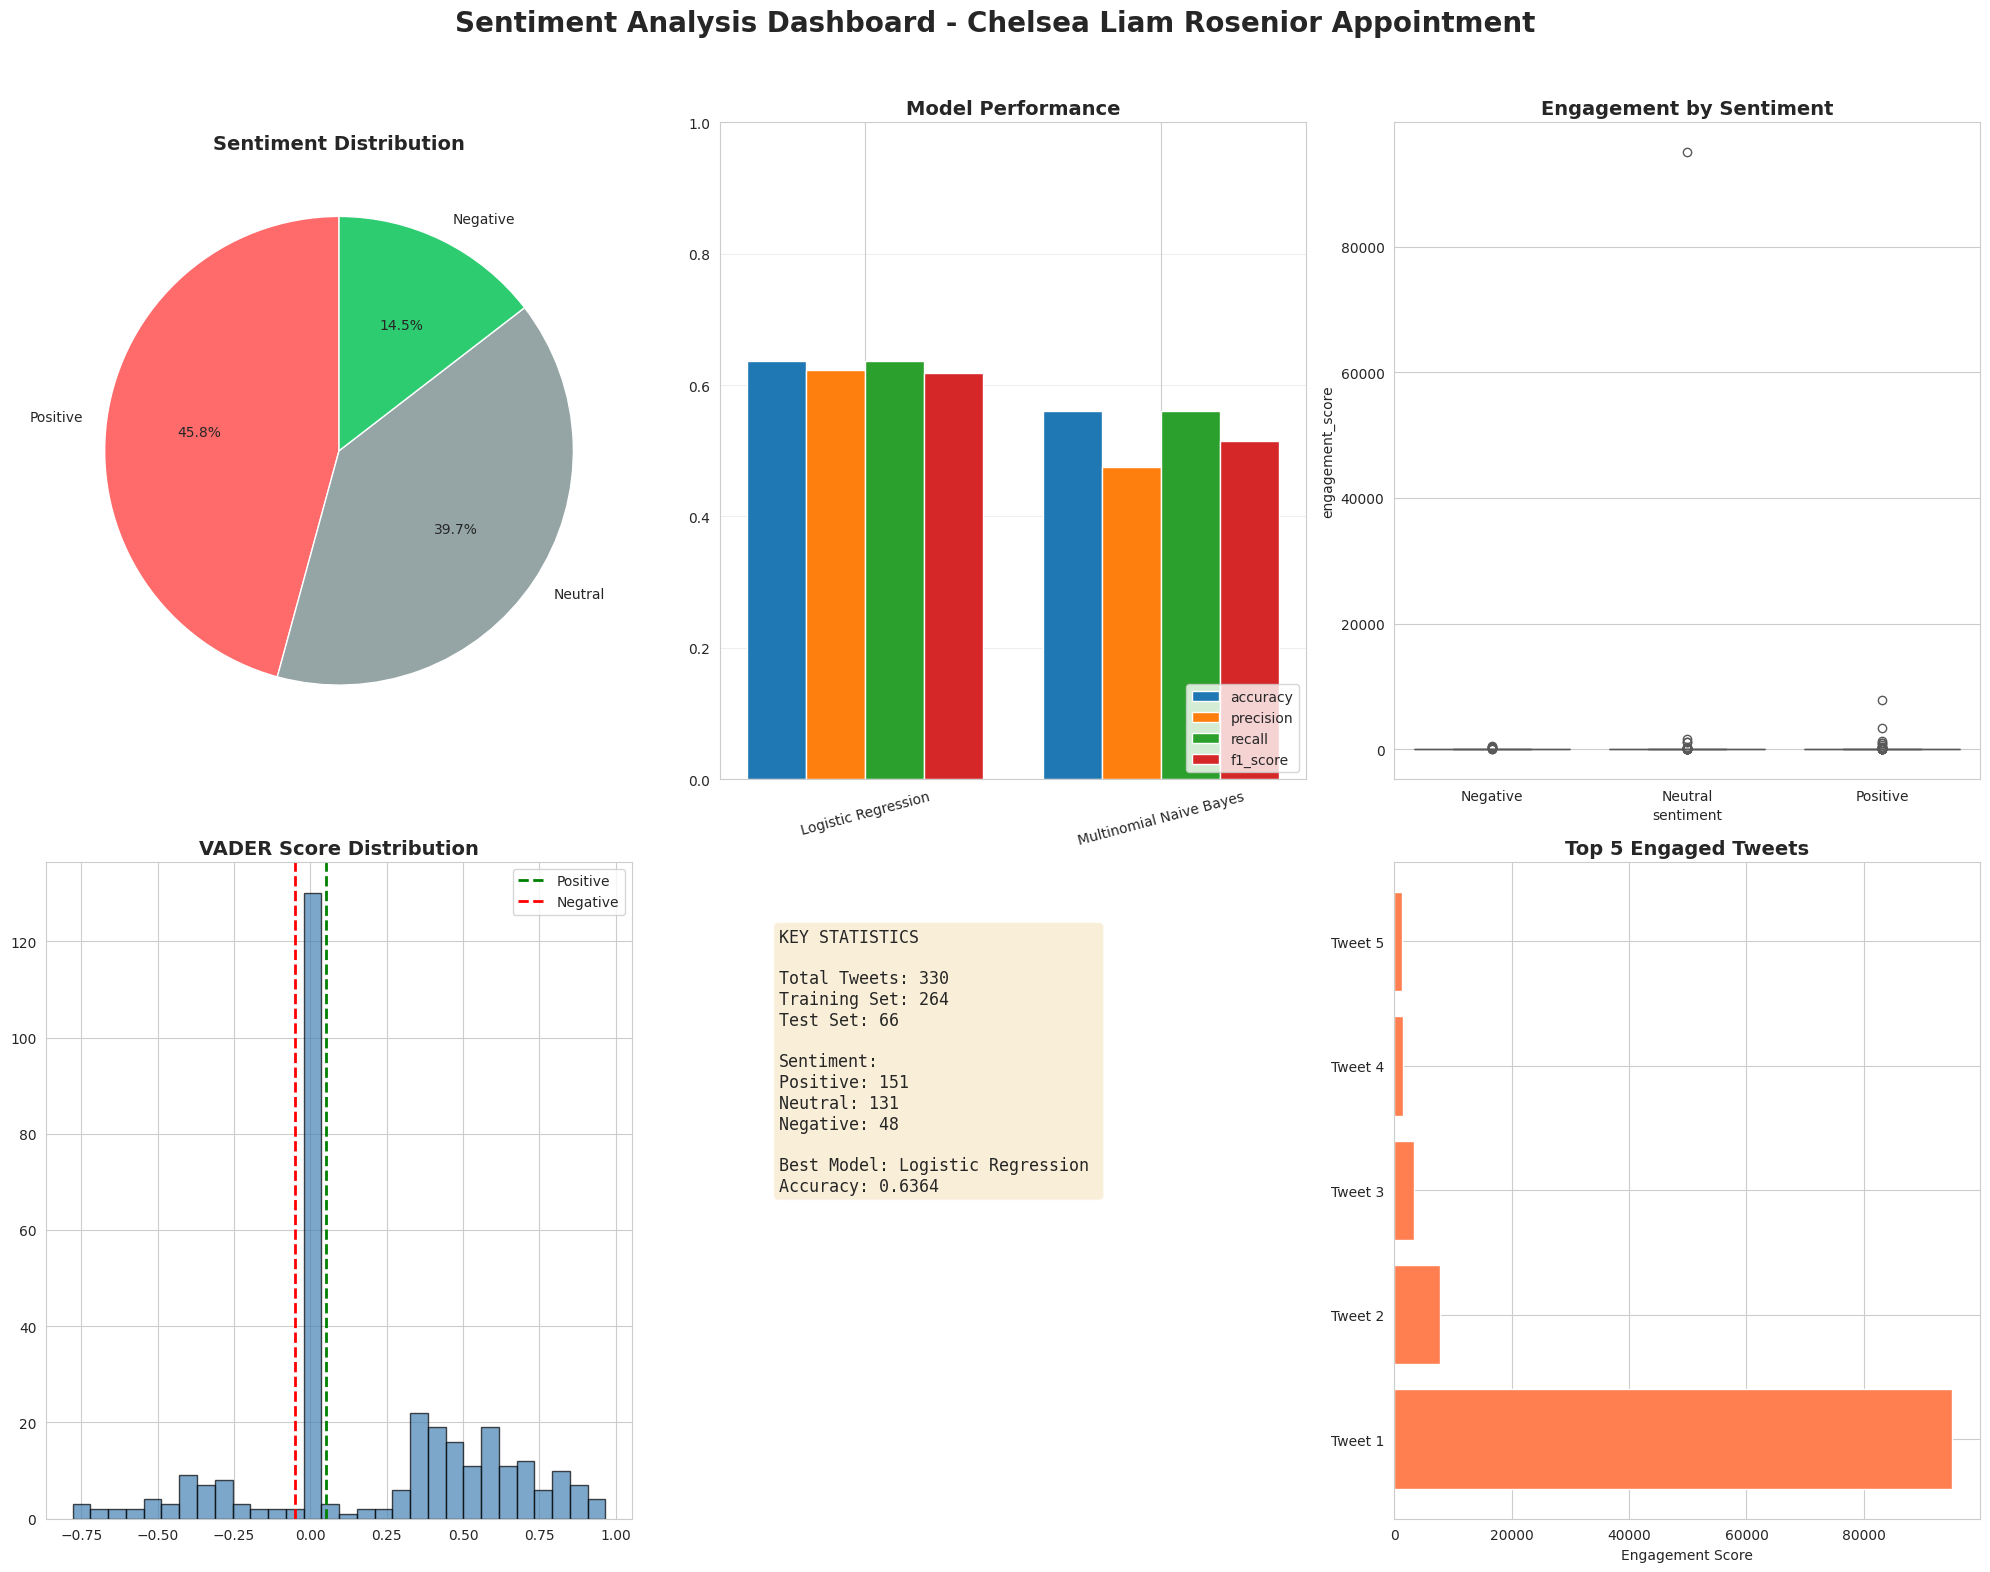

[OK] Executive dashboard saved


In [3]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(20, 16))

# Title
fig.suptitle('Sentiment Analysis Dashboard - Chelsea Liam Rosenior Appointment', 
             fontsize=20, fontweight='bold', y=0.98)

# 1. Sentiment Distribution
ax1 = fig.add_subplot(2, 3, 1)
sentiment_counts = df['sentiment'].value_counts()
colors = ['#ff6b6b', '#95a5a6', '#2ecc71']
ax1.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')

# 2. Model Comparison
ax2 = fig.add_subplot(2, 3, 2)
x = np.arange(len(model_comparison['model']))
width = 0.2
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for i, metric in enumerate(metrics):
    ax2.bar(x + i*width, model_comparison[metric], width, label=metric)
ax2.set_xticks(x + width*1.5)
ax2.set_xticklabels(model_comparison['model'], rotation=15)
ax2.set_ylim([0, 1])
ax2.set_title('Model Performance', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Engagement by Sentiment
ax3 = fig.add_subplot(2, 3, 3)
sns.boxplot(
    x='sentiment',
    y='engagement_score',
    data=df,
    order=['Negative', 'Neutral', 'Positive'],
    hue='sentiment',
    palette='Set2',
    legend=False,
    ax=ax3
)
ax3.set_title('Engagement by Sentiment', fontsize=14, fontweight='bold')

# 4. VADER Score Distribution
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(df['vader_compound'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax4.axvline(x=0.05, color='green', linestyle='--', linewidth=2, label='Positive')
ax4.axvline(x=-0.05, color='red', linestyle='--', linewidth=2, label='Negative')
ax4.set_title('VADER Score Distribution', fontsize=14, fontweight='bold')
ax4.legend()

# 5. Key Statistics
ax5 = fig.add_subplot(2, 3, 5)
ax5.axis('off')
best_model = model_comparison.loc[model_comparison['accuracy'].idxmax(), 'model']
best_acc = model_comparison['accuracy'].max()
pos_count = (df['sentiment']=='Positive').sum()
neu_count = (df['sentiment']=='Neutral').sum()
neg_count = (df['sentiment']=='Negative').sum()
stats_text = (
    'KEY STATISTICS\n\n'
    'Total Tweets: {} \n'
    'Training Set: {} \n'
    'Test Set: {} \n\n'
    'Sentiment:\n'
    'Positive: {} \n'
    'Neutral: {} \n'
    'Negative: {} \n\n'
    'Best Model: {} \n'
    'Accuracy: {:.4f}'
).format(len(df), int(len(df)*0.8), int(len(df)*0.2), pos_count, neu_count, neg_count, best_model, best_acc)
ax5.text(0.1, 0.9, stats_text, transform=ax5.transAxes, fontsize=12,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 6. Top Engagement Tweets
ax6 = fig.add_subplot(2, 3, 6)
top_engaged = df.nlargest(5, 'engagement_score')['engagement_score']
ax6.barh(range(5), top_engaged.values, color='coral')
ax6.set_yticks(range(5))
ax6.set_yticklabels(['Tweet ' + str(i+1) for i in range(5)])
ax6.set_title('Top 5 Engaged Tweets', fontsize=14, fontweight='bold')
ax6.set_xlabel('Engagement Score')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(utils.get_outputs_path('figures/executive_dashboard.png'), dpi=300, bbox_inches='tight')
plt.show()
print('[OK] Executive dashboard saved')

## 3. Generate Summary Tables

In [4]:
# Create final summary
summary_data = {
    'Metric': ['Total Tweets', 'Training Set', 'Test Set', 'Positive', 'Neutral', 
               'Negative', 'Best Model', 'Best Accuracy', 'Avg Engagement'],
    'Value': [len(df), int(len(df)*0.8), int(len(df)*0.2),
              (df['sentiment']=='Positive').sum(), (df['sentiment']=='Neutral').sum(),
              (df['sentiment']=='Negative').sum(), best_model, f"{best_acc:.4f}",
              f"{df['engagement_score'].mean():.2f}"]
}
summary_table = pd.DataFrame(summary_data)
summary_table.to_csv(utils.get_outputs_path('tables/final_summary.csv'), index=False)

print("Final Summary:")
print(summary_table.to_string(index=False))
print("Saved to outputs/tables/final_summary.csv")

Final Summary:
        Metric               Value
  Total Tweets                 330
  Training Set                 264
      Test Set                  66
      Positive                 151
       Neutral                 131
      Negative                  48
    Best Model Logistic Regression
 Best Accuracy              0.6364
Avg Engagement              373.05
Saved to outputs/tables/final_summary.csv


## 4. Sample Tweets by Sentiment

In [5]:
# Create sample tweets table
sample_tweets = []
for sentiment in ['Positive', 'Neutral', 'Negative']:
    sentiment_df = df[df['sentiment'] == sentiment].nlargest(3, 'engagement_score')
    for idx, row in sentiment_df.iterrows():
        sample_tweets.append({
            'Sentiment': sentiment,
            'Tweet': row['Tweet Content'][:150],
            'VADER_Score': round(row['vader_compound'], 3)
        })

sample_df = pd.DataFrame(sample_tweets)
sample_df.to_csv(utils.get_outputs_path('tables/sample_tweets.csv'), index=False)

print("Sample tweets saved to outputs/tables/sample_tweets.csv")

Sample tweets saved to outputs/tables/sample_tweets.csv


## 5. List All Output Files

In [6]:
print("Output Files:")
for output_dir in ['figures', 'tables', 'models', 'metrics']:
    dir_path = utils.get_outputs_path(output_dir)
    print(f"\n{output_dir}/")
    if os.path.exists(dir_path):
        for f in sorted(os.listdir(dir_path)):
            print(f"  - {f}")
    else:
        print("  (directory not found - run previous notebooks)")

Output Files:

figures/
  - compound_score_distribution.png
  - engagement_distribution.png
  - executive_dashboard.png
  - feature_importance.png
  - lr_confusion_matrix.png
  - model_comparison.png
  - nb_confusion_matrix.png
  - ngrams.png
  - sentiment_by_engagement.png
  - sentiment_distribution.png
  - text_statistics.png
  - top_words.png
  - tweets_by_hour.png
  - wordcloud.png

tables/
  - eda_summary.csv
  - final_summary.csv
  - model_comparison.csv
  - sample_tweets.csv
  - sentiment_summary.csv

models/
  - count_vectorizer.pkl
  - logistic_regression.pkl
  - naive_bayes.pkl
  - tfidf_vectorizer.pkl

metrics/
  - metrics.json


## 6. Project Completion Checklist

In [7]:
print("\nPROJECT COMPLETION CHECKLIST")
print("=" * 40)

checklist = [
    ("[X]", "Data preprocessing (Notebook 1)"),
    ("[X]", "EDA and visualization (Notebook 2)"),
    ("[X]", "Sentiment labeling with VADER (Notebook 3)"),
    ("[X]", "ML modeling (Notebook 4)"),
    ("[X]", "Results visualization (Notebook 5)"),
    ("[ ]", "Write final report (PDF)"),
    ("[ ]", "Create presentation slides (PPT PDF)"),
    ("[ ]", "Design poster (PDF)"),
    ("[ ]", "Record video presentation (MP4)"),
]

for status, item in checklist:
    print(f"  {status} {item}")

print("\nAll notebooks completed! Ready for deliverables.")


PROJECT COMPLETION CHECKLIST
  [X] Data preprocessing (Notebook 1)
  [X] EDA and visualization (Notebook 2)
  [X] Sentiment labeling with VADER (Notebook 3)
  [X] ML modeling (Notebook 4)
  [X] Results visualization (Notebook 5)
  [ ] Write final report (PDF)
  [ ] Create presentation slides (PPT PDF)
  [ ] Design poster (PDF)
  [ ] Record video presentation (MP4)

All notebooks completed! Ready for deliverables.


## Results Export Complete!

**Exported Files:**
- Executive Dashboard (PNG)
- Final Summary (CSV)
- Sample Tweets (CSV)

**Next Steps:**
- Create report using outputs/figures and outputs/tables
- Design presentation and poster
- Record video presentation